Question 1
Given the following set of X and Y values, implement Linear regression to find
and plot the best-fit line so that we can predict the response for any new feature
value of X. Implement linear regression using the Gradient Descent Algorithm.


---
X 0 1 2 3 4 5 6 7 8 9

Y 1 3 2 5 7 8 8 9 10 12



In [1]:
import numpy as np
import matplotlib.pyplot as plt


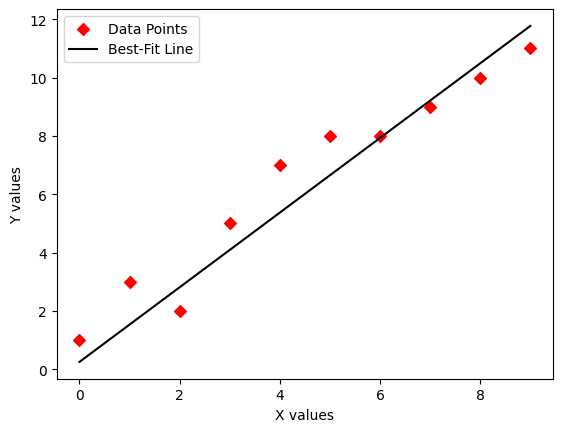

pridicted Y value:  13.047830533136752


In [2]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.c = 0
        self.m = 0

    def gradient_descent(self, learning_rate, num_iterations):
        m = len(self.X)
        for _ in range(num_iterations):
            predictions = self.predict(self.X)
            gradientc = (1/m) * np.sum(predictions - self.Y)
            gradientm = (1/m) * np.sum((predictions - self.Y) * self.X)
            self.c -= learning_rate * gradientc
            self.m -= learning_rate * gradientm

    def predict(self, X):
        return self.c + self.m * X

    def plot_best_fit(self):
        plt.scatter(self.X, self.Y, color='red', label='Data Points',marker='D')
        plt.plot(self.X, self.predict(self.X), color='black', label='Best-Fit Line')
        plt.xlabel('X values')
        plt.ylabel('Y values')
        plt.legend()
        plt.show()

def main():
    X = np.array([0,1,2,3,4,5,6,7,8,9])
    Y = np.array([1,3,2,5,7,8,8,9,10,11])

    regressor = LinearRegression(X, Y)
    learning_rate = 0.001
    num_iterations = 150

    regressor.gradient_descent(learning_rate, num_iterations)
    regressor.plot_best_fit()

    new_x=int(input("enter new X value: "))
    new_y=regressor.predict(new_x)
    print("pridicted Y value: ",new_y)


if __name__ == '__main__':
    main()


Question 2
Implement multiple linear regression on the Boston house pricing data set
using Scikit-learn.



**Hint to load the dataset:
from sklearn import datasets
boston = datasets.load_boston()

In [3]:
import pandas as pd

In [4]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
df = pd.read_csv(data_url, sep="\s+",skiprows=22,header=None)

print(df.shape)

(1012, 11)


In [5]:
df



,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [6]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
df = pd.read_csv("BostonHousing.csv")
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 20.93275021868356
Root Mean Squared Error (RMSE): 4.575232258441484


Mean Squared Error (MSE): 33.44897999767639
Root Mean Squared Error (RMSE): 5.783509315085123Mean Squared Error (MSE): 20.932750218683722
Root Mean Squared Error (RMSE): 4.575232258441502

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class MultipleLinearRegression:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y.reshape(-1, 1)
        self.theta = np.zeros((self.X.shape[1], 1))

    def fit(self):
        X_transpose = np.transpose(self.X)
        self.theta = np.linalg.inv(X_transpose @ self.X) @ X_transpose @ self.Y

    def predict(self, X):
        return X @ self.theta

def main():

    df = pd.read_csv("BostonHousing.csv")

    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values

    model = MultipleLinearRegression(X, y)

    model.fit()

    y_pred = model.predict(X)

    mse = np.mean((y - y_pred)**2)

    print("Mean Squared Error:", mse)

if __name__ == '__main__':
    main()


Mean Squared Error: 147.48040538208625
